## Setup

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from tqdm import notebook
import seaborn as sns 
import imageio
import time
from IPython.display import HTML

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [3]:
np.random.seed(0)

In [4]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2,random_state=0)


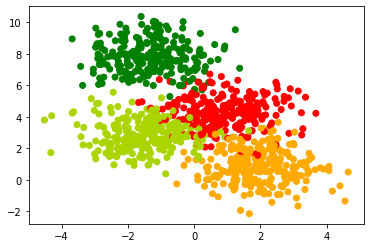

In [5]:
plt.scatter(data[:,0],data[:,1], c=labels,cmap=my_cmap)
plt.show()

In [6]:
labels_orig = labels
labels = np.mod(labels_orig,2)

## Comparing between Vectored and Normal FeedForward network for Multiclass Data

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [8]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


In [9]:
class FFSN_MultiClass_Specific:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    # input layer
    self.x1, self.x2 = x
    
    # hidden layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5, self.h6])
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.dw5 = (self.h3-self.y1) * self.h1 
    self.dw6 = (self.h3-self.y1) * self.h2
    self.db3 = (self.h3-self.y1)
                    
    self.dw7 = (self.h4-self.y2) * self.h1
    self.dw8 = (self.h4-self.y2) * self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw9 = (self.h5-self.y3) * self.h1
    self.dw10 = (self.h5-self.y3) * self.h2
    self.db5 = (self.h5-self.y3)
    
    self.dw11 = (self.h6-self.y4) * self.h1
    self.dw12 = (self.h6-self.y4) * self.h2
    self.db6 = (self.h6-self.y4)
                    
    self.dh1 = (self.h3-self.y1)*self.w5 + (self.h4-self.y2)*self.w7 + (self.h5-self.y3)*self.w9 + (self.h6-self.y4)*self.w11
    self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
    self.dw2 = self.dh1 * self.h1*(1-self.h1) * self.x2
    self.db1 = self.dh1 * self.h1*(1-self.h1)
                    
    self.dh2 = (self.h3-self.y1)*self.w6 + (self.h4-self.y2)*self.w8 + (self.h5-self.y3)*self.w10 + (self.h6-self.y4)*self.w12
    self.dw3 = self.dh2 * self.h2*(1-self.h2) * self.x1
    self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
    self.db2 = self.dh2 * self.h2*(1-self.h2)
    
  def grad_short(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3
    
    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db4 = self.da4
    
    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db5 = self.da5
    
    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db6 = self.da6
    
    self.dh1 = self.da3*self.w5 + self.da4*self.w7 + self.da5*self.w9 + self.da6*self.w11
    self.dh2 = self.da3*self.w6 + self.da4*self.w8 + self.da5*self.w10 + self.da6*self.w12
    
    self.da1 = self.dh1 * self.h1*(1-self.h1)
    self.da2 = self.dh2 * self.h2*(1-self.h2)
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1
    
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self.db2 = self.da2
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = []
    
    for i in notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db1 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss.append(log_loss(np.argmax(Y, axis=1), Y_pred))
        
      if display_weight:
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                   self.b4, self.w7, self.w8, 
                                   self.b5, self.w9, self.w10, 
                                   self.b6, self.w11, self.w12], 
                                  [0, 0, 0,
                                   self.b1, self.w1, self.w2,
                                   self.b2, self.w3, self.w4, 
                                   0, 0, 0]])
        weight_matrices.append(weight_matrix)
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [10]:
class FF_MultiClass_InputWeightVectorised:
    def __init__(self):
        self.W1 = np.random.randn(2,2)
        self.W2 = np.random.randn(2,4)
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,4))

    def sigmoid(self, X):
        return 1.0/(1.0 + np.exp(-X))

    def softmax(self, X):
        exps = np.exp(X)
        return exps / np.sum(exps,axis=1).reshape(-1,1)

    def forward_pass(self, X):
        self.A1 = np.matmul(X, self.W1) + self.B1 #(N,2)*(2,2) = (N,2)
        self.H1 = self.sigmoid(self.A1) #(N,2)
        self.A2 = np.matmul(self.H1,self.W2) + self.B2 #(N,2) *(2,4) = (N,4)
        self.H2 = self.softmax(self.A2) # (N,4)

        return self.H2

    def grad_sigmoid(self, X):
        return X*(1-X)

    def grad(self, X, Y):
        self.forward_pass(X)
        m = X.shape[0]

        self.dA2 = self.H2 - Y #(N,4)-(N,4) = (N,4)
        self.dW2 = np.matmul(self.H1.T, self.dA2) #(2,N) * (N,4) = (2,4)
        self.dB2 = np.sum(self.dA2, axis=0).reshape(1,-1) # (N,4) ->  (1,4)

        self.dH1 = np.matmul(self.dA2,self.W2.T) #(N,4) * (4,2) = (N,2)
        self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))# (N,2)
        self.dW1 = np.matmul(X.T,self.dA1) #(2,N)*(N,2) -> (2,2)
        self.dB1 = np.sum(self.dA1, axis = 0).reshape(1, -1)

    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False ):
        if display_loss:
            loss = []

        for i in notebook.tqdm(range(epochs), total= epochs, unit="epoch"):
            self.grad(X,Y) 

            m = X.shape[0]
            self.W2 -= learning_rate * (self.dW2/m)
            self.B2 -= learning_rate * (self.dB2/m)
            self.W1 -= learning_rate * (self.dW1/m)
            self.B1 -= learning_rate * (self.dB1/m)

            if display_loss:
                Y_pred = self.predict(X)
                loss.append(log_loss(np.argmax(Y, axis=1), Y_pred))

        if display_loss:
            plt.plot(loss)
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
            
    def predict(self, X):
        Y_pred = self.forward_pass(X)
        return np.array(Y_pred).squeeze()


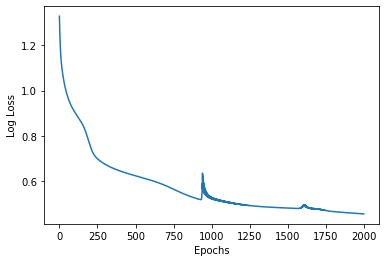

Time taken by model 1: 119.31689214706421


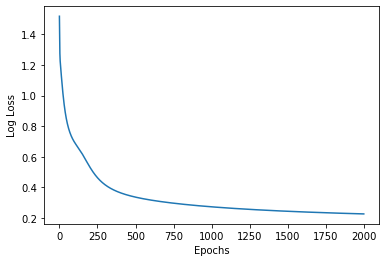

Time taken by model 2: 1.8549983501434326


In [11]:
models_init = [FFSN_MultiClass_Specific(),FF_MultiClass_InputWeightVectorised()]
models = []
for idx, model in enumerate(models_init, start=1):
  tic = time.time()
  ffsn_multi_specific = model
  ffsn_multi_specific.fit(X_train,y_OH_train,epochs=2000,learning_rate=.5,display_loss=True)
  models.append(ffsn_multi_specific)
  toc = time.time()
  print("Time taken by model {}: {}".format(idx, toc-tic))

In [12]:
for idx, model in enumerate(models, start=1):
  Y_pred_train = model.predict(X_train)
  Y_pred_train = np.argmax(Y_pred_train,1)

  Y_pred_val = model.predict(X_val)
  Y_pred_val = np.argmax(Y_pred_val,1)

  accuracy_train = accuracy_score(Y_pred_train, Y_train)
  accuracy_val = accuracy_score(Y_pred_val, Y_val)
  
  print("Model {}".format(idx))
  print("Training accuracy", round(accuracy_train, 2))
  print("Validation accuracy", round(accuracy_val, 2))

Model 1
Training accuracy 0.74
Validation accuracy 0.73
Model 2
Training accuracy 0.92
Validation accuracy 0.94


In this Neural network we seen a improvement over 65x speedup and better accuracy with vectorisation implementation

## Comparing Execrcise Simple Network

In [13]:
HTML('<img src="NetworkForExercise.png">')

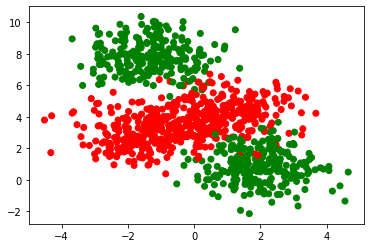

In [14]:
plt.scatter(data[:,0],data[:,1], c=labels,cmap=my_cmap)
plt.show()

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [16]:
class ExerciseFFNetwork:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0 
    self.b5 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))


  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.h4 = self.sigmoid(self.a4)
    self.a5 = self.w9*self.h3 + self.w10*self.h4 + self.b5
    self.h5 = self.sigmoid(self.a5)
    return self.h5
  
  def grad(self, x, y):
    self.forward_pass(x)

    self.da5 = (self.h5 - y)

    self.dw9 = self.da5*self.h3
    self.dw10 = self.da5*self.h4
    self.db5 = self.da5

    self.dh3 = self.da5*self.w9
    self.dh4 = self.da5*self.w10

    self.da3 = self.dh3 * self.h3*(1-self.h3)
    self.da4 = self.dh4 * self.h4*(1-self.h4)

    self.dw5 = self.da3 * self.h1
    self.dw6 = self.da3 * self.h2
    self.db3 = self.da3

    self.dw7 = self.da4 * self.h1
    self.dw8 = self.da4 * self.h2
    self.db4 = self.da4

    self.dh1 = self.w5*self.da3 + self.w7*self.da4
    self.dh2 = self.w6*self.da3 + self.w8*self.da4

    self.da1 = self.dh1*self.h1*(1-self.h1)
    self.da2 = self.dh2*self.h2*(1-self.h2)

    self.dw1 = self.da1 * self.x1
    self.dw2 = self.da1 * self.x2
    self.db1 = self.da1

    self.dw3 = self.da2 * self.x1
    self.dw4 = self.da2 * self.x2
    self.db2 = self.da2
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False, display_weight=False,displaY_gif=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.w7 = np.random.randn()
      self.w8 = np.random.randn()
      self.w9 = np.random.randn()
      self.w10 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0 
      
    if display_loss:
      loss = []
    
    for i in notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, db1, db2, db3, db4, db5 = [0]*15
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db3
        db5 += self.db3
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss.append(mean_squared_error(Y_pred, Y))
        
      if display_weight:
        weight_matrix = np.array([[0, self.b5, self.w9, self.w10, 0, 0],
        [self.b3,self.w5,self.w6,self.b4,self.w7,self.w8],
        [self.b1, self.w1, self.w2, self.b2, self.w3, self.w4]])
        weight_matrices.append(weight_matrix)

      if i%100 == 0 and displaY_gif==True:
        image.append(plot_boundary_exerc(i))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)

  def predict_h4(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h4)
    return np.array(Y_pred)

  def predict_h5(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h5)
    return np.array(Y_pred)

In [17]:
class Exercise_MultiClass_InputWeightVectorised:
    def __init__(self):
        self.W1 = np.random.randn(2,2)
        self.W2 = np.random.randn(2,2)
        self.W3 = np.random.randn(2,1)
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,2))
        self.B3 = 0

    def sigmoid(self, X):
        return 1.0/(1.0 + np.exp(-X))

    def softmax(self, X):
        exps = np.exp(X)
        return exps / np.sum(exps,axis=1).reshape(-1,1)

    def forward_pass(self, X):

        self.A1 = np.matmul(X, self.W1) + self.B1 #(N,2)*(2,2) = (N,2)
        self.H1 = self.sigmoid(self.A1) #(N,2)
        self.A2 = np.matmul(self.H1,self.W2) + self.B2 #(N,2) *(2,2) = (N,2)
        self.H2 = self.sigmoid(self.A2) # (N,2)
        self.A3 = np.matmul(self.H2,self.W3) + self.B3 #(N,2) *(2,1) = (N,1)
        self.H3 = self.sigmoid(self.A3) # (N,1)
        return self.H3

    def grad_sigmoid(self, X):
        return X*(1-X)

    def grad(self, X, Y):
        self.forward_pass(X)
        m = X.shape[0]

        self.dA3 = self.H3 - Y #(N,1)-(N,1) = (N,1)

        self.dW3 = np.matmul(self.H2.T, self.dA3) #(2,N) * (N,1) = (2,1)
        self.dB3 = np.sum(self.dA3, axis=0).reshape(1,-1) # (N,1) ->  (1,1)
        self.dH2 = np.matmul(self.dA3, self.W3.T) #(N,1) * (1,2) = (N,2)
        self.dA2 = np.multiply(self.dH2,self.grad_sigmoid(self.H2))# (N,2)
        self.dW2 = np.matmul(self.H1.T,self.dA2) #(2,N)*(N,2) -> (2,2)
        self.dB2 = np.sum(self.dA2, axis = 0).reshape(1, -1)

        self.dH1 = np.matmul(self.dA2,self.W2.T) #(N,2) * (2,2) = (N,2)
        self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))# (N,2)
        self.dW1 = np.matmul(X.T,self.dA1) #(2,N)*(N,2) -> (2,2)
        self.dB1 = np.sum(self.dA1, axis = 0).reshape(1, -1) #(1,2)

    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False ):
        if display_loss:
            loss = []

        for i in notebook.tqdm(range(epochs), total= epochs, unit="epoch"):

            self.grad(X,Y) 
            m = X.shape[0]
            
            self.W3 -= learning_rate * (self.dW3/m)
            self.B3 -= learning_rate * (self.dB3/m)
            self.W2 -= learning_rate * (self.dW2/m)
            self.B2 -= learning_rate * (self.dB2/m)
            self.W1 -= learning_rate * (self.dW1/m)
            self.B1 -= learning_rate * (self.dB1/m)

            if display_loss:
                Y_pred = self.predict(X)
                loss.append(mean_squared_error(Y, Y_pred))

        if display_loss:
            plt.plot(loss)
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def predict(self, X):
        Y_pred = self.forward_pass(X)
        return np.array(Y_pred).squeeze()


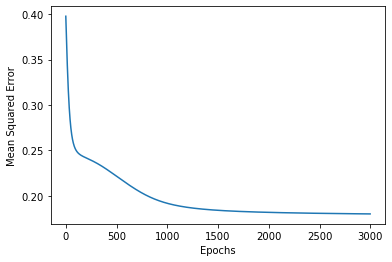

Time taken by model 1: 213.66021037101746


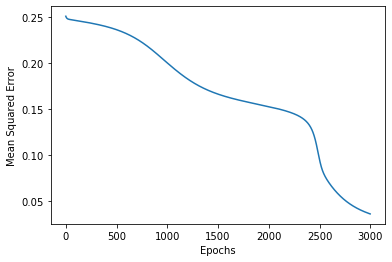

Time taken by model 2: 1.7200007438659668


In [18]:
models_init = [ExerciseFFNetwork(),Exercise_MultiClass_InputWeightVectorised()]
models = []
for idx, model in enumerate(models_init, start=1):
  tic = time.time()
  ffsn_multi_specific = model
  ffsn_multi_specific.fit(X_train,Y_train.reshape(-1,1),epochs=3000,learning_rate=.1,display_loss=True)
  models.append(ffsn_multi_specific)
  toc = time.time()
  print("Time taken by model {}: {}".format(idx, toc-tic))

In [19]:
for idx, model in enumerate(models, start=1):
    Y_pred_train = model.predict(X_train)

    Y_pred_val = model.predict(X_val)
  
    for i in range(len(Y_pred_train)):
        Y_pred_train[i] = 0 if Y_pred_train[i]<0.5 else 1

    for i in range(len(Y_pred_val)):
        Y_pred_val[i] = 0 if Y_pred_val[i]<0.5 else 1    

    accuracy_train = accuracy_score(Y_pred_train, Y_train)
    accuracy_val = accuracy_score(Y_pred_val, Y_val)
  
    print("Model {}".format(idx))
    print("Training accuracy", round(accuracy_train, 2))
    print("Validation accuracy", round(accuracy_val, 2))

Model 1
Training accuracy 0.73
Validation accuracy 0.72
Model 2
Training accuracy 0.96
Validation accuracy 0.94


Clearly we see a improvement over 119x with the vectorisation , with better accuracy in the network. 

## Now we compare Generic Multiclass models with vecorisation and without vecorisation

In [20]:
class FFSN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = []
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[0]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss.append(self.cross_entropy(Y, Y_pred))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

In [21]:
class Vecorised_FFSN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps,axis=1).reshape(-1,1)

  def forward_pass(self, X):
    self.A = {}
    self.H = {}
    
    self.H[0] = X
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])

    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = []
      

    for epoch in notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
      self.grad(X, Y)
      m = X.shape[0]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (self.dW[i+1]/m)
        self.B[i+1] -= learning_rate * (np.sum(self.dB[i+1],axis=0).reshape(1,-1)/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss.append(self.cross_entropy(Y, Y_pred))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [23]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


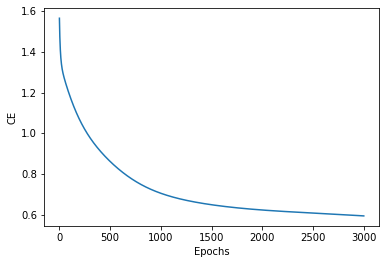

Time taken by model 1: 175.4103946685791


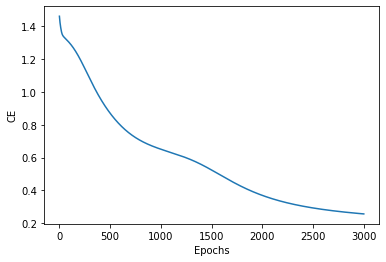

Time taken by model 2: 1.3340258598327637


In [24]:
models_init = [FFSN_MultiClass(2,4,[3,3]), Vecorised_FFSN_MultiClass(2,4,[3,3])]
models = []
for idx, model in enumerate(models_init, start=1):
  tic = time.time()
  ffsn_multi_specific = model
  ffsn_multi_specific.fit(X_train,y_OH_train,epochs=3000,learning_rate=.1,display_loss=True)
  models.append(ffsn_multi_specific)
  toc = time.time()
  print("Time taken by model {}: {}".format(idx, toc-tic))

In [25]:
for idx, model in enumerate(models, start=1):
  Y_pred_train = model.predict(X_train)
  Y_pred_train = np.argmax(Y_pred_train,1)

  Y_pred_val = model.predict(X_val)
  Y_pred_val = np.argmax(Y_pred_val,1)

  accuracy_train = accuracy_score(Y_pred_train, Y_train)
  accuracy_val = accuracy_score(Y_pred_val, Y_val)
  
  print("Model {}".format(idx))
  print("Training accuracy", round(accuracy_train, 2))
  print("Validation accuracy", round(accuracy_val, 2))

Model 1
Training accuracy 0.72
Validation accuracy 0.74
Model 2
Training accuracy 0.92
Validation accuracy 0.94


Clearnly with this vectorisation we have improved speed up upto ~200x and with improved accuracy of this model